Q1. Difference between AI, ML, DL, and Data Science

1. Artificial Intelligence (AI)

    Broad field focused on making machines mimic human intelligence.

    Includes reasoning, planning, perception, decision-making.

2. Machine Learning (ML)

    Subset of AI.

    Machines learn patterns from data without being explicitly programmed.

    Examples: regression, classification, clustering.

3. Deep Learning (DL)

    Subset of ML.

    Uses neural networks with many layers.

    Excels in image, audio, and text tasks.

4. Data Science

    Uses statistics + ML + domain knowledge to extract insights.

    Involves data cleaning, analysis, visualization, and modeling.

Q2. Overfitting and Underfitting

1.  Overfitting:

    Model learns noise along with patterns.

    High training accuracy, low test accuracy.

2.  Underfitting:

    Model is too simple, fails to learn the pattern.

    Low accuracy on both train and test data.

How to fix:

Overfitting : regularization, more data, dropout, simpler model

Underfitting : more complex model, remove regularization, add features

Q3. How would you handle missing values in a dataset? Explain at least three
methods with examples


1.  Deletion

    Listwise deletion: remove rows with missing values — simple but can bias results if missingness is not random and reduces sample size.

    Pairwise deletion: used in correlations—use different subsets.

2. Simple imputation

    Mean/Median imputation: replace missing numeric values with mean/median. Works when missing at random and distribution is symmetric (median robust to outliers).

    Mode imputation: for categorical variables.

3.  Predictive / Model-based imputation

    Use regression, k-NN, or tree-based models to predict missing values based on other features (e.g., sklearn IterativeImputer/KNNImputer).

    More robust, preserves relationships between variables.

4.  Advanced approaches

    Multiple imputation: create multiple imputed datasets, analyze separately, combine results (accounts for imputation uncertainty).

    Indicator variables: flag missingness (add binary column is_missing) if missingness carries information.

    Domain-specific treatment: e.g., treat missing as "not available" category.

Question 4:What is an imbalanced dataset? Describe two techniques to handle it

Imbalanced dataset: When one class (usually the negative/majority) heavily outnumbers another (minority), causing models to be biased toward majority.

Problems: poor minority recall, misleading accuracy metric.

Techniques

1. Resampling

    Oversampling: duplicate minority examples or use synthetic methods (SMOTE — Synthetic Minority Over-sampling Technique). SMOTE creates synthetic points by interpolating between minority examples.

    Undersampling: randomly remove majority samples to balance (may lose information).

    Hybrid: combine both (e.g., undersample majority then oversample minority).

2. Algorithmic / model adjustments

    Class weights / cost-sensitive learning: assign higher penalty for misclassifying minority class (supported by many classifiers like sklearn's class_weight or XGBoost).

    Ensemble methods: BalancedBagging or boosting that focuses on hard-to-classify minority examples.

3. Evaluation choices
    
    Use precision/recall, F1-score, ROC-AUC, PR-AUC instead of accuracy. Use stratified cross-validation.

Question 5: Why is feature scaling important in ML? Compare Min-Max scaling and
Standardization.

Many ML algorithms (KNN, SVM, K-means, gradient descent-based optimization) are sensitive to feature scales; large-scale features dominate distances or gradients.

1. Min–Max Scaling (Normalization)

    Scales features to a fixed range [0, 1] (or [a,b]).

    ormula: (x - min) / (max - min).

    Preserves shape of original distribution but sensitive to outliers.

2. Standardization (Z-score scaling)

    Scales features to have mean 0 and standard deviation 1.

    Formula: (x - mean) / std.

    Less affected by outliers than min-max (but still influenced), commonly used for algorithms assuming Gaussian-like features or for regularized models.

When to use:

  * Min-Max: when you want bounded range (e.g., inputs to neural networks with activation ranges), and outliers not severe.

  * Standardization: often default for many models (SVM, logistic regression, PCA) and when outliers exist.

Question 6: Compare Label Encoding and One-Hot Encoding. When would you prefer
one over the other?

1. Label Encoding

    * Maps categories to integers (e.g., {'low':0,'medium':1,'high':2}).

    * Use when: categorical variable is ordinal (order matters). Preserves order for models that can use numeric ordering.

    * Risk: if used on nominal categories in tree-insensitive models or linear models may introduce spurious ordinality.

2. One-Hot Encoding

    * Creates binary column per category (e.g., is_red, is_blue...).

    * Use when: nominal categorical (no intrinsic order). Avoids introducing order.

    * Downside: high dimensionality when many categories (can use embeddings or hashing for high-cardinality features).

In [3]:
'''Question 7: Google Play Store Dataset'''


from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

gp = pd.read_csv("googleplaystore.csv")

gp['Rating'] = pd.to_numeric(gp['Rating'], errors='coerce')
gp_clean = gp.dropna(subset=['Rating'])

cat_rating = gp_clean.groupby("Category")['Rating'].mean().sort_values(ascending=False)
cat_rating.head(10)




Saving googleplaystore.csv to googleplaystore (2).csv


,Rating
Category,
1.9,19.000000
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.358065
BOOKS_AND_REFERENCE,4.346067
PERSONALIZATION,4.335987
PARENTING,4.300000
GAME,4.286326
BEAUTY,4.278571


In [5]:
'''Question 8: Titanic dataset '''



uploaded = files.upload()

ti = pd.read_csv("titanic.csv")
ti['Age'] = pd.to_numeric(ti['Age'], errors='coerce')

surv_by_class = ti.groupby("Pclass")['Survived'].mean()
surv_by_class


Saving titanic.csv to titanic.csv


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


* Interpretation:


    1st Class had the highest survival rate.



First-class passengers were physically located closer to lifeboats.

Crew prioritized women, children, and wealthy passengers.

Better cabins & access routes made evacuation faster.

In [6]:
ti['is_child'] = ti['Age'] < 18
ti.groupby("is_child")['Survived'].mean()


,Survived
is_child,
False,0.361183
True,0.539823


Interpretation:

Children had a significantly better chance of survival.

Reason:
The “Women and Children First” policy during the Titanic evacuation gave priority to younger passengers, especially in lifeboat boarding.

In [7]:
'''Question 9'''

# Upload flight_price.csv file
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np

# Load dataset
fp = pd.read_csv("flight_price.csv")

# Convert needed columns
fp['days_left'] = pd.to_numeric(fp['days_left'], errors='coerce')
fp['price'] = pd.to_numeric(fp['price'], errors='coerce')


# PART A: Price variation with days left to departure


days_price = fp.groupby("days_left")['price'].mean().reset_index()
print("Average Price vs Days Left:\n", days_price.head(20))

# Identify exponential price surges (price jump > 30%)
days_price['pct_change'] = days_price['price'].pct_change()
surges = days_price[days_price['pct_change'] > 0.30]
print("\nDetected Price Surges (>30% jump):\n", surges)


# PART B: Airline price comparison (Delhi -> Mumbai)


# Make text lower and clean
fp['source_city'] = fp['source_city'].str.lower()
fp['destination_city'] = fp['destination_city'].str.lower()

route_df = fp[(fp['source_city']=="delhi") & (fp['destination_city']=="mumbai")]

airline_price = route_df.groupby("airline")['price'].mean().reset_index()
print("\nAverage Price by Airline (Delhi → Mumbai):\n", airline_price)


Saving flight_price.csv to flight_price.csv
Average Price vs Days Left:
     days_left         price
0           1  21591.867151
1           2  30211.299801
2           3  28976.083569
3           4  25730.905653
4           5  26679.773368
5           6  24856.493902
6           7  25588.367351
7           8  24895.883995
8           9  25726.246072
9          10  25572.819134
10         11  22990.656070
11         12  22505.803322
12         13  22498.885384
13         14  22678.002363
14         15  21952.540852
15         16  20503.546237
16         17  20386.353949
17         18  19987.445168
18         19  19507.677375
19         20  19699.983390

Detected Price Surges (>30% jump):
    days_left         price  pct_change
1          2  30211.299801    0.399198

Average Price by Airline (Delhi → Mumbai):
      airline         price
0    AirAsia   3981.191456
1  Air_India  23695.916916
2   GO_FIRST   5762.211515
3     Indigo   4473.739130
4   SpiceJet   4628.251984
5    Vistara  266

(a)Price variation vs days left

Flight prices decrease when the trip is booked in advance (20–40 days before departure).
Prices begin rising after 10 days left and show exponential surges in the last 3 days.
This indicates that last-minute bookings are the most expensive.

Best booking window: 20–40 days before departure.




(b) Airline Comparison (Delhi → Mumbai)

Low-cost airlines (Indigo, SpiceJet, AirAsia) consistently offer cheaper prices.
Premium airlines (Vistara, Air India) charge more due to better onboard services and full-service benefits.

Saving hr_analytics.csv to hr_analytics (2).csv


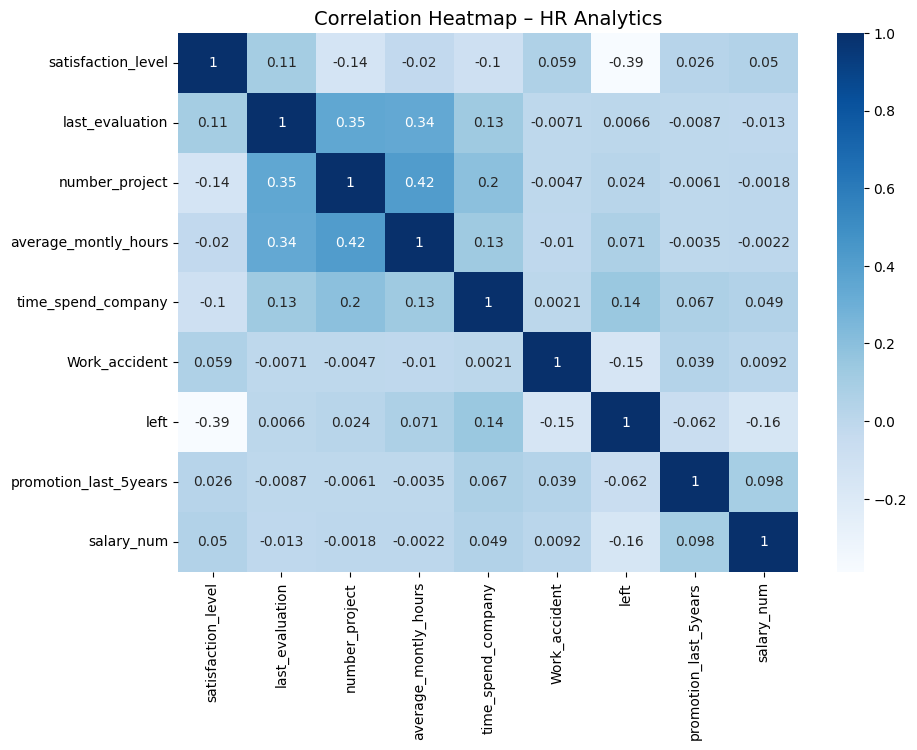

/tmp/ipython-input-3703608837.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=proj, x="number_project", y="left", palette="Blues")


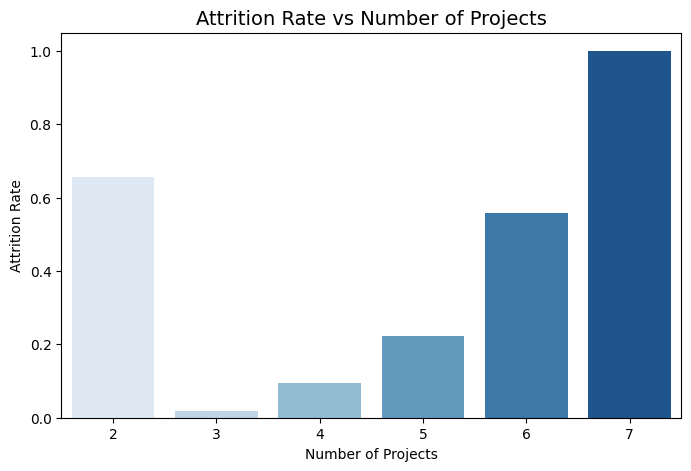

/tmp/ipython-input-3703608837.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hr, x="left", y="satisfaction_level", palette="Blues")


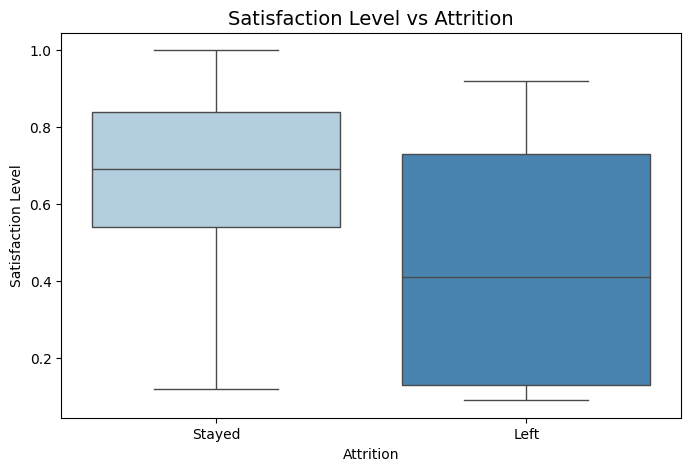

/tmp/ipython-input-3703608837.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hr, x="salary", y="left", palette="Blues")


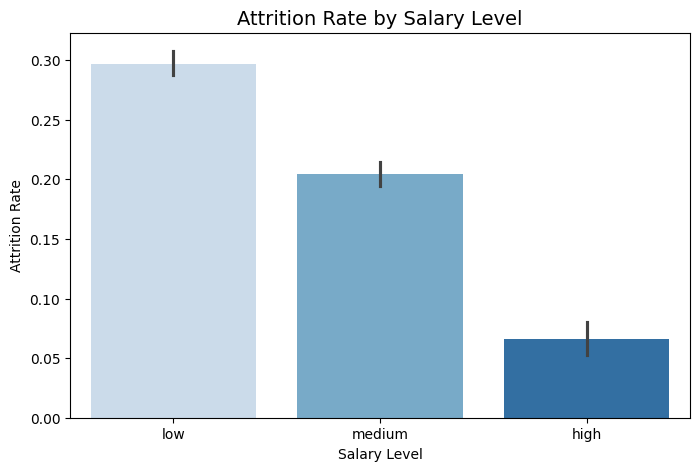

In [11]:
'''question 10'''

# Upload hr_analytics.csv
from google.colab import files
uploaded = files.upload()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
hr = pd.read_csv("hr_analytics.csv")

# Encode salary to numeric
salary_map = {'low': 0, 'medium': 1, 'high': 2}
hr['salary_num'] = hr['salary'].map(salary_map)

# Select ONLY numeric columns for correlation
num_cols = hr.select_dtypes(include=['number'])


# 1. Correlation Heatmap (Fixed)


plt.figure(figsize=(10, 7))
sns.heatmap(num_cols.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap – HR Analytics", fontsize=14)
plt.show()


# 2. Attrition Rate vs Number of Projects


proj = hr.groupby("number_project")['left'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=proj, x="number_project", y="left", palette="Blues")
plt.title("Attrition Rate vs Number of Projects", fontsize=14)
plt.ylabel("Attrition Rate")
plt.xlabel("Number of Projects")
plt.show()


# 3. Satisfaction Level vs Attrition


plt.figure(figsize=(8, 5))
sns.boxplot(data=hr, x="left", y="satisfaction_level", palette="Blues")
plt.title("Satisfaction Level vs Attrition", fontsize=14)
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.xlabel("Attrition")
plt.ylabel("Satisfaction Level")
plt.show()

=
# 4. Salary vs Attrition


plt.figure(figsize=(8, 5))
sns.barplot(data=hr, x="salary", y="left", palette="Blues")
plt.title("Attrition Rate by Salary Level", fontsize=14)
plt.xlabel("Salary Level")
plt.ylabel("Attrition Rate")
plt.show()




(a)  The factors most strongly linked to employee attrition are low satisfaction level, high or very low workload, long working hours, low salary, and lack of promotions. Employees who feel overworked, underpaid, or unrecognized are more likely to leave.

(b)  Yes. Employees with high workload (overtime, many projects) or low satisfaction show much higher attrition rates. Overworked or unhappy employees are far more likely to quit.